# Introduction to Google Colab

## Jupyter notebook basics

### Code cells

In [ ]:
2*5

10

In [ ]:
python.__version__

NameError: ignored

### Text cells

Example of **text cell**

## Access to the shell

In [ ]:
!ls

sample_data


In [ ]:
!pwd

/content


## Install Spark

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [ ]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [ ]:
#!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD&bom=true&query=select+*

--2021-11-25 04:50:49--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [        <=>         ]   1.64G  3.25MB/s    in 8m 52s  

2021-11-25 04:59:41 (3.15 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1756416870]



In [ ]:
#!ls

In [ ]:
#!mv rows.csv?accessType=DOWNLOAD reported-crimes.csv

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# copy it there
#!cp reported-crimes.csv /content/drive/MyDrive

In [ ]:
%cd drive/MyDrive/Colab\ Notebooks/Data

/content/drive/MyDrive/Colab Notebooks/Data


In [ ]:
!ls

predicted.csv  reported-crimes.csv  Test  test_vc2kHdQ.csv  Train


In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('/content/drive/My Drive/Colab Notebooks/Data/reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

## Schemas

In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [ ]:
labels = [
          ('ID', StringType()),
          ('Case Number', StringType()),
          ('Date', StringType()),
          ('Block', StringType()),
          ('IUCR', StringType()),
          ('Primary Type', StringType()),
          ('Description', StringType()),
          ('Location Description', StringType()),
          ('Arrest', StringType()),
          ('Domestic', StringType()),
          ('Beat', StringType()),
          ('District', StringType()),
          ('Ward', StringType()),
          ('Community Area', StringType()),
          ('FBI Code', StringType()),
          ('X Coordinate', StringType()),
          ('Y Coordinate', StringType()),
          ('Year', StringType()),
          ('Updated On', StringType()),
          ('Latitude', StringType()),
          ('Longitude', StringType()),
          ('Location', StringType())
          ]

NameError: ignored

In [ ]:
cust_schema = StructType([StructField(x[0], x[1], True) for x in labels])
cust_schema

NameError: ignored

In [ ]:
rc = spark.read.csv('reported-crimes.csv',header=True, schema=cust_schema)
rc.printSchema()

NameError: ignored

In [ ]:
rc.show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|   

## Working with columns

#### *Display only the first 5 rows of the column name IUCR*

In [ ]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [ ]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [ ]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



#### *Display only the first 4 rows of the column names Case Number, Date and Arrest*

In [ ]:
rc.select('Case Number', 'Date', 'Arrest').show(4)

+-----------+--------------------+------+
|Case Number|                Date|Arrest|
+-----------+--------------------+------+
|   HY411648|09/05/2015 01:30:...| false|
|   HY411615|09/04/2015 11:30:...| false|
|   JC213529|09/01/2018 12:01:...| false|
|   HY411595|09/05/2015 12:45:...|  true|
+-----------+--------------------+------+
only showing top 4 rows



#### *Add a column with name One, with entries all 1s*

In [ ]:
from pyspark.sql.functions import lit
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    t

#### *Remove the column IUCR*

In [ ]:
rc.drop(col('IUCR'))
rc.show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|   

In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

## Working with rows

#### *Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.*

In [ ]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))

In [ ]:
one_day.count()

3

In [ ]:
rc.union(one_day).orderBy('Date', ascending=False).show(7)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11516594|   JB528186| 2018-11-12 00:00:00| 049XX S PRAIRIE AVE|2826|       OTHER OFFENSE|HARASSMENT BY ELE...|             

#### *What are the top 10 number of reported crimes by Primary type, in descending order of occurence?*

In [ ]:
rc.groupBy('Primary type').count().orderBy('count', ascending = False).show(10)

+-------------------+-------+
|       Primary type|  count|
+-------------------+-------+
|              THEFT|1565909|
|            BATTERY|1365158|
|    CRIMINAL DAMAGE| 848692|
|          NARCOTICS| 739765|
|            ASSAULT| 477969|
|      OTHER OFFENSE| 462668|
|           BURGLARY| 413575|
|MOTOR VEHICLE THEFT| 343476|
| DECEPTIVE PRACTICE| 320115|
|            ROBBERY| 279496|
+-------------------+-------+
only showing top 10 rows



## Challenge I

#### *What percentage of reported crimes resulted in an arrest?*

In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
rc.select(rc.Arrest).show(5)

+------+
|Arrest|
+------+
| false|
| false|
| false|
|  true|
| false|
+------+
only showing top 5 rows



In [ ]:
rc.filter(rc.Arrest == 'true').count()/rc.count()

0.26783214293152596

#### *What are the top 3 locations for reported crimes?*

In [ ]:
rc.groupBy('Location Description').count().orderBy('count', ascending= False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1931109|
|           RESIDENCE|1261313|
|           APARTMENT| 813018|
+--------------------+-------+
only showing top 3 rows



## Built-in functions

In [ ]:
from pyspark.sql import functions
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

In [ ]:
from pyspark.sql.functions import *

#### *Display the Primary Type column in lower and upper characters, and the first 4 characters of the column*

In [ ]:
rc.select(lower(col('Primary type')), upper(col('Primary type')), substring(col('Primary type'), 1, 4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary type)|upper(Primary type)|substring(Primary type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



#### *Show the oldest date and the most recent date*

In [ ]:
rc.select(min(col('Date')), max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



#### *What is 3 days earlier that the oldest date and 3 days later than the most recent date?*

In [ ]:
rc.select(date_sub(min(col('Date')), 3), date_add(max(col('Date')), 3)).show(1) 

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-13|
+----------------------+----------------------+



## Date functions

In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [ ]:
df = spark.createDataFrame([('2021-12-25 14:30:00',)], ['Christmas'])
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2021-12-25 14:30:00|
+-------------------+



In [ ]:
df.select(to_date(col("Christmas"), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col("Christmas"), 'yyyy-MM-dd HH:mm:ss')).show(1)

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2021-12-25|                             2021-12-25 14:30:00|
+-------------------------------------------+------------------------------------------------+



In [ ]:
df = spark.createDataFrame([('25/Dec/2021 14:30:00',)], ['Christmas'])
df.show()

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2021 14:30:00|
+--------------------+



In [ ]:
df.select(to_date(col("Christmas"), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col("Christmas"), 'dd/MMM/yyyy HH:mm:ss')).show(1)

+--------------------------------------------+-------------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2021-12-25|                              2021-12-25 14:30:00|
+--------------------------------------------+-------------------------------------------------+



## Joins

In [ ]:
!ls

drive  sample_data  spark-2.3.1-bin-hadoop2.7  spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
ps = spark.read.csv('/content/drive/My Drive/Colab Notebooks/Data/Police_Stations.csv',header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

In [ ]:
rc.count()

6754849

In [ ]:
ps.count()

24

#### *The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset*

In [ ]:
ps.select(col('DISTRICT')).distinct().show()

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
+------------+
only showing top 20 rows



In [ ]:
rc.select(col('DISTRICT')).distinct().show()

+--------+
|DISTRICT|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
+--------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import lpad

In [ ]:
ps = ps.withColumn('Format District', lpad(col('DISTRICT'), 3, '0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format District|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [ ]:
rc.join(ps, rc.District==ps['Format District'], 'left_outer').show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format District|
+--------+

#### *What is the most frequently reported non-criminal activity*

In [ ]:
rc.select('Primary type').distinct().count()

36

In [ ]:
rc.select('Primary type').distinct().show(35, truncate=False)

+---------------------------------+
|Primary type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|STALKING                         |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|ARSON                            |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|NON - CRIMINAL                   |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|RITUALISM                        |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE         

In [ ]:
nc = rc.filter((col('Primary Type')=='NON - CRIMINAL') | (col('Primary type')=='NON-CRIMINAL (SUBJECT SPECIFIED)') | (col('Primary type')=='NON-CRIMINAL'))

In [ ]:
nc.show(5)

+--------+-----------+-------------------+--------------------+----+--------------+-----------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|  Primary Type|      Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------+-----------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10233370|   HY421530|2015-09-13 10:45:00|  010XX S MENARD AVE|5114|NON - CRIMINAL|FOID - REVOCATION|           RESIDENCE|  true|   false|1513|     015|  

In [ ]:
nc.groupBy(col('Description')).count().orderBy('count', ascending=False).show(5)

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|       LOST PASSPORT|  107|
|   FOID - REVOCATION|   75|
|NOTIFICATION OF C...|    9|
|NOTIFICATION OF S...|    8|
|      FOUND PASSPORT|    4|
+--------------------+-----+
only showing top 5 rows



#### *Using a bar chart, plot which day of the week has the most number of reported crime.*

In [ ]:
from pyspark.sql.functions import dayofweek, date_format

In [ ]:
rc.select(dayofweek(col('Date')), col('Date')).show(5)

+---------------+-------------------+
|dayofweek(Date)|               Date|
+---------------+-------------------+
|              7|2015-09-05 13:30:00|
|              6|2015-09-04 11:30:00|
|              7|2018-09-01 00:01:00|
|              7|2015-09-05 12:45:00|
|              7|2015-09-05 13:00:00|
+---------------+-------------------+
only showing top 5 rows



In [ ]:
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [ ]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending=False).show(5)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017193|
|                 Wed| 974104|
|                 Tue| 968242|
|                 Sat| 965374|
|                 Thu| 964809|
+--------------------+-------+
only showing top 5 rows



In [ ]:
cweek = rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending=False)

In [ ]:
cweek.show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017193|
|                 Wed| 974104|
|                 Tue| 968242|
|                 Sat| 965374|
|                 Thu| 964809|
|                 Mon| 952962|
|                 Sun| 912165|
+--------------------+-------+



In [ ]:
dow = [x[0] for x in cweek.collect()]
counts = [x[1] for x in cweek.collect()]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cp = pd.DataFrame({'Day of week': dow, 'Counts': counts})
cp.head(7)

,Day of week,Counts
0,Fri,1017193
1,Wed,974104
2,Tue,968242
3,Sat,965374
4,Thu,964809
5,Mon,952962
6,Sun,912165


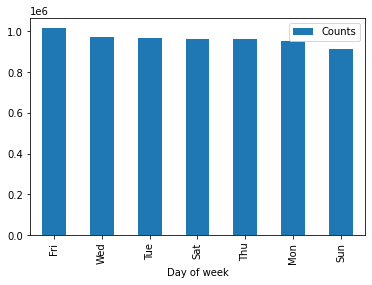

In [ ]:
cp.sort_values('Counts', ascending=False).plot(kind='bar', x='Day of week', y='Counts')

## RDD's

In [ ]:
psrdd = sc.textFile('/content/drive/My Drive/Colab Notebooks/Data/Police_Stations.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [ ]:
psheader = psrdd.first()

In [ ]:
ps_noheader = psrdd.filter(lambda line : line != psheader)

#### *How many police stations are there?*

In [ ]:
ps_noheader.map(lambda line : line.split(',')).count()

24

#### *Display the District ID, District name, Address and Zip for the police station with District ID 7*

In [ ]:
ps_noheader.filter(lambda line : line.split(',')[0]=='7').map(lambda line : (line.split(',')[0], line.split(',')[1], line.split(',')[2], line.split(',')[5])).collect()

[('7', 'Englewood', '1438 W 63rd St', '60636')]

#### *Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code*

In [ ]:
ps_noheader.filter(lambda line : line.split(',')[0] in ['10', '11']).map(lambda line : (line.split(',')[0], line.split(',')[1], line.split(',')[2], line.split(',')[5])).collect()

[('10', 'Ogden', '3315 W Ogden Ave', '60623'),
 ('11', 'Harrison', '3151 W Harrison St', '60612')]